# preamble

In [47]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# Day 4 pandas action items

1. How many different companies are represented in the data set?
2. What is the total number of jobs created for businesses in Queens?
3. How many different unique email domains names are there in the data set?
4. Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?
5. Save your result for the previous question as a CSV file.

In [258]:
df = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')

In [259]:
# number of companies
companies = df['Company Name'].value_counts() # gets rid of duplicates
companies = companies.dropna()
companies.index.size

439

In [260]:
# number of jobs created in Queens
queens=df[df['Borough'] == 'Queens']
# print(queens.columns)
queens['Job created'].sum()

102.0

In [261]:
# unique email addresses
# print(df['company email'].dropna().shape)
df['company email'].dropna().nunique()

420

In [262]:
df.columns

Index(['Company Name', 'company contact', 'company email', 'company phone',
       'Address', 'City', 'State', 'Postcode', 'Industry', 'Industry descr',
       'Company Type', 'Current fulltime', 'Job created', 'Job retain',
       'Effective Date', 'Total Savings',
       'Savings from beginning receiving benefits', 'Borough', 'Latitude',
       'Longitude', 'Community Board', 'Council District', 'Census Tract',
       'BIN', 'BBL', 'NTA'],
      dtype='object')

In [263]:
# get names of NTAs with >5 companies listed
NTAs = df[['Company Name','NTA']].dropna().NTA.value_counts()
NTAs = NTAs[NTAs >= 5]

In [268]:
# find NTAs with > 5 unique companies
nta_cond = df.groupby(['NTA']).nunique()
nta_cond = nta_cond.index[nta_cond['Company Name'] >= 5]
nta_cond

Index(['Battery Park City-Lower Manhattan', 'Bushwick South',
       'Carroll Gardens-Columbia Street-Red Hook', 'College Point',
       'Crown Heights North',
       'DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill', 'East New York',
       'East Williamsburg', 'Greenpoint',
       'Hunters Point-Sunnyside-West Maspeth', 'Hunts Point', 'Manhattanville',
       'Maspeth', 'Mott Haven-Port Morris',
       'Queensbridge-Ravenswood-Long Island City',
       'SoHo-TriBeCa-Civic Center-Little Italy',
       'Springfield Gardens South-Brookville', 'Steinway', 'Sunset Park West',
       'park-cemetery-etc-Brooklyn'],
      dtype='object', name='NTA')

In [269]:
# apply to df and get numbers
above5 = df[['Total Savings','Job created','NTA']][df.NTA.isin(nta_cond)]
grouped = above5.groupby('NTA')
grouped = grouped.agg(
    {
        'Total Savings': 'mean',
        'Job created': 'sum'
    }
)
print(grouped)

                                                  Total Savings  Job created
NTA                                                                         
Battery Park City-Lower Manhattan                 469890.796667          0.0
Bushwick South                                     26140.455000         10.0
Carroll Gardens-Columbia Street-Red Hook           24337.390000          0.0
College Point                                      17159.372857          2.0
Crown Heights North                                 4036.298889          0.0
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill   59950.340000          0.0
East New York                                      48433.093333         15.0
East Williamsburg                                  13990.626364          0.0
Greenpoint                                          9753.649286          0.0
Hunters Point-Sunnyside-West Maspeth               23931.398933          0.0
Hunts Point                                        39246.016154         12.0

In [270]:
grouped.to_csv('mean_savings_and_tot_jobs_per_NTA.csv')

# day 5 matplotlib action items

In [84]:
# the one we generated
df1 = pd.read_csv('mean_savings_and_tot_jobs_per_NTA.csv')

In [85]:
# original data
df = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')

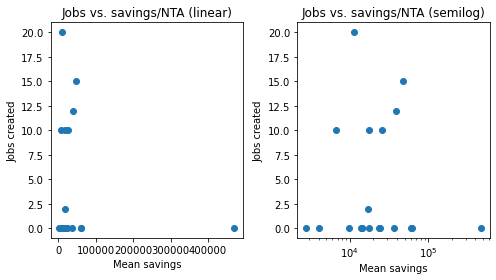

In [156]:
# scatter plot
x = df1['Total Savings']
y = df1['Job created']

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(7,4))
ax1.scatter(x,y,marker='o')
ax1.set_title('Jobs vs. savings/NTA (linear)')
ax1.set_ylabel('Jobs created')
ax1.set_xlabel('Mean savings')

ax2.scatter(x,y,marker='o')
ax2.set_title('Jobs vs. savings/NTA (semilog)')
ax2.set_xscale('log')
ax2.set_ylabel('Jobs created')
ax2.set_xlabel('Mean savings')
plt.tight_layout()

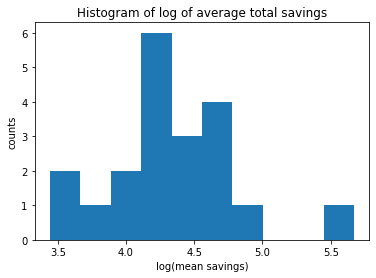

In [152]:
# histogram of log of average total savings
x = df1['Total Savings']
log_savings = np.log10(np.array(x))
fig = plt.figure('histogram')
plt.hist(log_savings,bins=10) # not enough points for more bins
plt.xlabel('log(mean savings)')
plt.ylabel('counts')
plt.title('Histogram of log of average total savings')
plt.show()

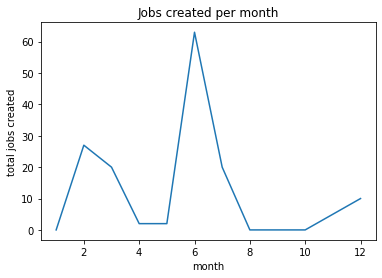

In [151]:
# line plot of total jobs created for each month
# this needs the total data set, so pull from df

# drop all rows without jobs or effective dates
new_df = df[['Effective Date','Job created']].dropna()
# convert strings to datetimes
new_df['Effective Date'] = pd.to_datetime(new_df['Effective Date'])
new_df['month'] = new_df['Effective Date'].apply(lambda x: x.month)
# add up jobs in months
new_df = new_df.groupby('month').sum()
# set jobs = 0 for months that aren't represented
new_df = new_df.reindex(list(range(1,13)),fill_value=0)

x = np.array(new_df.index)
y = np.array(new_df['Job created'])
fig = plt.figure('line plot')
plt.plot(x,y)
plt.xlabel('month')
plt.ylabel('total jobs created')
plt.title('Jobs created per month')
plt.show()